In [1]:
pip install mplsoccer

Note: you may need to restart the kernel to use updated packages.


In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mplsoccer import Pitch, VerticalPitch
from PIL import Image

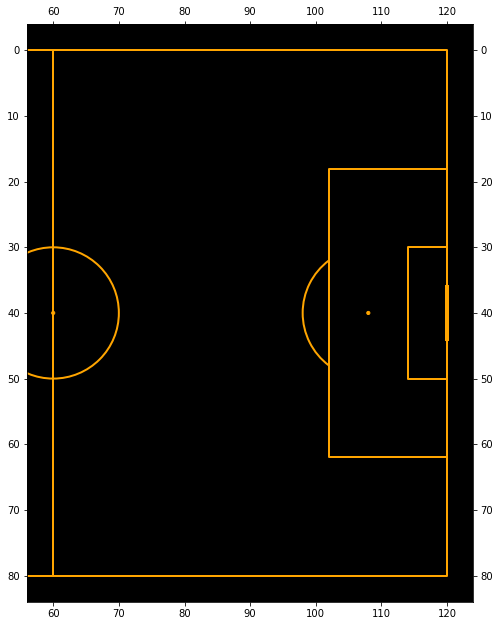

In [4]:
# Création du terrain

fig, ax = plt.subplots(figsize=(8, 14)) # Taille du graphique

pitch = Pitch(pitch_type = 'statsbomb', pitch_color = 'black', line_color = 'orange', 
              half = True, label = True, axis = True, tick = True)   

# label = graduation
# Si on veut vertical : VerticalPitch(...)

pitch.draw(ax=ax)  # dessiner le terrain : ici ça prend tt le graphique


In [9]:
# Coordonnées des points

# Positions des 5 joueurs de l'ASSE (JPK, Aiki, Lobry...)
ASSE_x = [109, 101, 98, 103, 96]
ASSE_y = [45, 55, 48, 25, 56]


QRM_x = [118, 109, 113, 110, 108, 109, 105, 95, 90]
QRM_y = [40, 44, 40, 46, 50, 53, 59, 65, 60]

ASSE = list(np.ones((5,), dtype=int))
QRM =list(np.zeros((9,), dtype=int))

df = pd.DataFrame({
    'x': QRM_x + ASSE_x,
    'y': QRM_y + ASSE_y,
    'team': QRM + ASSE
    
})
df

,x,y,team
0,118,40,0
1,109,44,0
2,113,40,0
3,110,46,0
4,108,50,0
5,109,53,0
6,105,59,0
7,95,65,0
8,90,60,0
9,109,45,1


In [36]:
points = np.column_stack((df.x, df.y))
points

array([[118,  40],
       [109,  44],
       [113,  40],
       [110,  46],
       [108,  50],
       [109,  53],
       [105,  59],
       [ 95,  65],
       [ 90,  60],
       [109,  45],
       [101,  55],
       [ 98,  48],
       [103,  25],
       [ 96,  56]], dtype=int64)

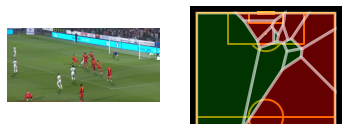

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2) # Taille du graphique

image = Image.open("C:/Users/lione/Images/JPK_QRM.png")
ax1.imshow(image, label = False)
ax1.set_axis_off() # Ne pas afficher les axes pour le compartiement ax1 (image)

fig.set_facecolor("none")  # couleur de l'arrière plan (tout ce qui est en dehors du graphe)
ax.patch.set_facecolor("#22312b") # couleur de l'arrière plan du graphe

pitch = VerticalPitch(pitch_type = 'statsbomb', pitch_color = 'black', line_color = 'orange', 
              half = True)   

pitch.draw(ax=ax2)

x = df.x
y = df.y
team1, team2 = pitch.voronoi(x, y, df.team)

t1 = pitch.polygon(team1, ax=ax2, fc='green', ec='white', lw=3, alpha=.4)  # team1 = ASSE
t2 = pitch.polygon(team2, ax=ax2, fc='red', ec='white', lw=3, alpha=.4)

plt.savefig('JPK_Voronoi.png',dpi=800)